# Exploratory data analysis (EDA)

## Data preparation

### Import library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.formula.api as smf
from sklearn import linear_model #package we need to do Lasso regression
from sklearn.metrics import mean_squared_error #metric: MSE
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant


%matplotlib inline
sns.set_context('notebook')

### Load data

##### Load training data

In [2]:
atm_data = pd.read_csv('ATM_training.csv')
atm_data.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127


In [3]:
atm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     22000 non-null  float64
 1   ATMs      22000 non-null  int64  
 2   Downtown  22000 non-null  int64  
 3   Weekday   22000 non-null  int64  
 4   Center    22000 non-null  int64  
 5   High      22000 non-null  int64  
 6   Withdraw  22000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


In [4]:
atm_data.describe()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
count,22000.000000,22000.000000,22000.00000,22000.000000,22000.000000,22000.000000,22000.000000
mean,7.316373,7.937455,0.70200,0.714091,0.102455,0.301591,54.652818
std,4.118692,3.673415,0.45739,0.451857,0.303252,0.458959,25.099767
min,0.800000,0.000000,0.00000,0.000000,0.000000,0.000000,11.668197
25%,1.050000,4.000000,0.00000,0.000000,0.000000,0.000000,18.500386
50%,9.890000,9.000000,1.00000,1.000000,0.000000,0.000000,68.240749
75%,10.070000,11.000000,1.00000,1.000000,0.000000,1.000000,71.345778
max,10.830000,17.000000,1.00000,1.000000,1.000000,1.000000,103.964065


In [5]:
atm_data.dropna()
atm_data.drop_duplicates()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127
...,...,...,...,...,...,...,...
21995,10.15,12,1,0,0,0,71.384290
21996,1.01,2,0,1,0,0,16.031066
21997,0.96,3,0,1,0,0,14.968847
21998,9.91,6,1,0,0,0,73.705665


In [6]:
atm_data.nunique()

Shops         182
ATMs           18
Downtown        2
Weekday         2
Center          2
High            2
Withdraw    21999
dtype: int64

In [7]:
atm_data.count()

Shops       22000
ATMs        22000
Downtown    22000
Weekday     22000
Center      22000
High        22000
Withdraw    22000
dtype: int64

##### Load test data

In [8]:
real_test = pd.read_csv('ATM_test_without_Withdraw.csv')
real_test.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw Prediction
0,0.94,4,0,0,0,0,NaN
1,10.05,8,1,1,0,0,NaN
2,10.06,13,1,1,0,0,NaN
3,10.56,12,1,1,0,0,NaN
4,10.17,7,1,1,0,0,NaN


In [9]:
real_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997 entries, 0 to 3996
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Shops                3997 non-null   float64
 1   ATMs                 3997 non-null   int64  
 2   Downtown             3997 non-null   int64  
 3   Weekday              3997 non-null   int64  
 4   Center               3997 non-null   int64  
 5   High                 3997 non-null   int64  
 6   Withdraw Prediction  0 non-null      float64
dtypes: float64(2), int64(5)
memory usage: 218.7 KB


In [10]:
real_test.describe()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw Prediction
count,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,0.0
mean,7.293338,7.860395,0.699274,0.731799,0.095071,0.291719,NaN
std,4.131500,3.630317,0.458631,0.443078,0.293350,0.454610,NaN
min,0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.050000,4.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,9.890000,9.000000,1.000000,1.000000,0.000000,0.000000,NaN
75%,10.080000,11.000000,1.000000,1.000000,0.000000,1.000000,NaN
max,10.620000,16.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [11]:
real_test.dropna()
real_test.drop_duplicates()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw Prediction
0,0.94,4,0,0,0,0,NaN
1,10.05,8,1,1,0,0,NaN
2,10.06,13,1,1,0,0,NaN
3,10.56,12,1,1,0,0,NaN
4,10.17,7,1,1,0,0,NaN
...,...,...,...,...,...,...,...
3983,10.39,9,1,1,0,0,NaN
3984,0.97,5,0,0,0,1,NaN
3989,10.00,8,1,0,0,0,NaN
3990,9.64,13,1,1,1,0,NaN


In [12]:
real_test.nunique()

Shops                  150
ATMs                    17
Downtown                 2
Weekday                  2
Center                   2
High                     2
Withdraw Prediction      0
dtype: int64

## Correlation heatmap

#### Correlation heatmap of training data

[Text(0.5, 1.0, 'Correlation map of training data')]

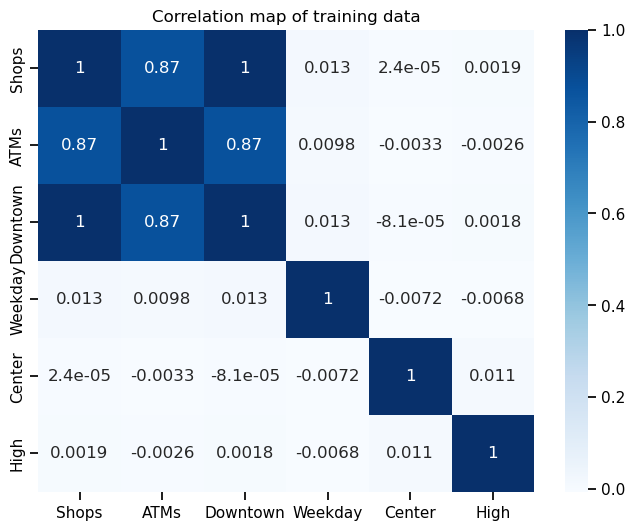

In [13]:
col_index = [0,1,2,3,4,5]
atm_predictors = atm_data.iloc[2:, col_index]

# Create the correlation matrix
f, ax = plt.subplots(figsize=(8, 6))
corr = atm_predictors.corr()

sns.heatmap(corr, cmap="Blues", annot=True).set(title='Correlation map of training data')

There are a strong correlation between ATMs and Shops, ATMs and Downtown, and Shops and Downtown. Therefore, it is likely that multicolinearity exists.

#### Correlation heatmap of test data

[Text(0.5, 1.0, 'Correlation map of test data')]

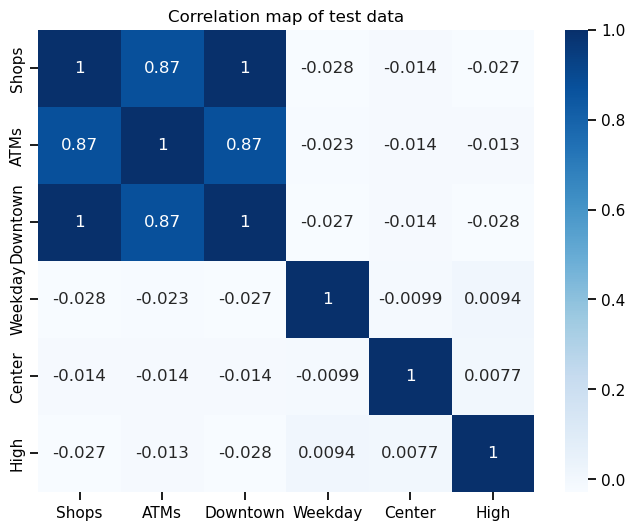

In [14]:
col_index = [0,1,2,3,4,5]
atm_predictors = real_test.iloc[2:, col_index]

# Create the correlation matrix
f, ax = plt.subplots(figsize=(8, 6))
corr = atm_predictors.corr()

sns.heatmap(corr, cmap="Blues", annot=True).set(title='Correlation map of test data')

Although there is a slight difference in terms of positive or negative correlation in some pairs compared to those of test dataset, the general trend is not much of difference. There are still a strong correlation between ATMs and Shops, ATMs and Downtown, and Shops and Downtown.

## Data visualization

### Numerical variables

Plot numerical data with the response variable

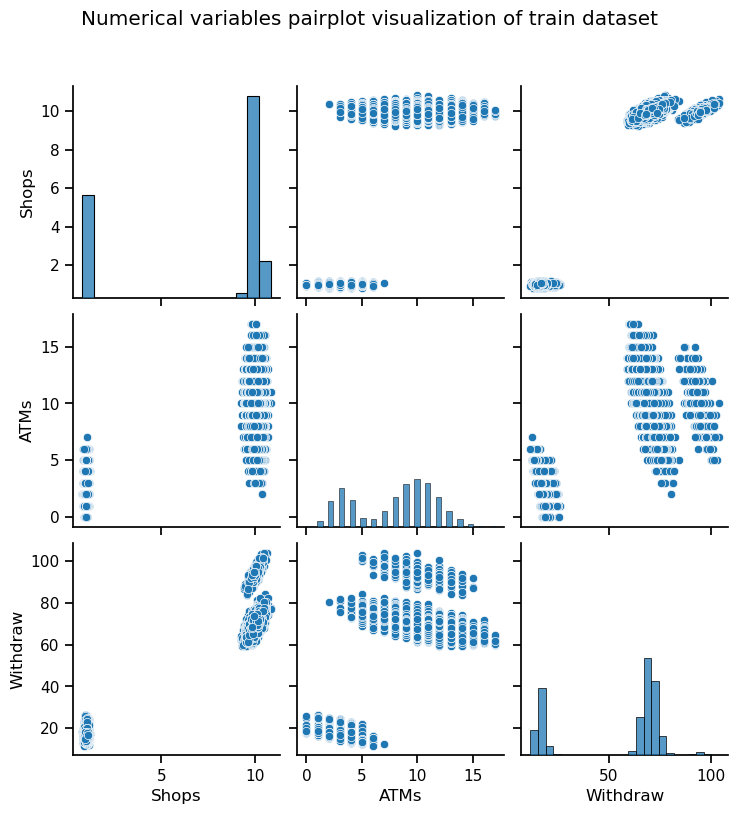

In [15]:
numerical_features = ['Shops','ATMs', 'Withdraw']
numerical_data = atm_data[numerical_features]
g = sns.pairplot(numerical_data)
g.fig.suptitle("Numerical variables pairplot visualization of train dataset", y=1.08)
plt.show()

These pairplots show a tendency of data clusters. Hence, there may exist clusters with difference in characterisics and behaviour. In the context of this dataset, the dataset maybe a representation of different customer segmentations.

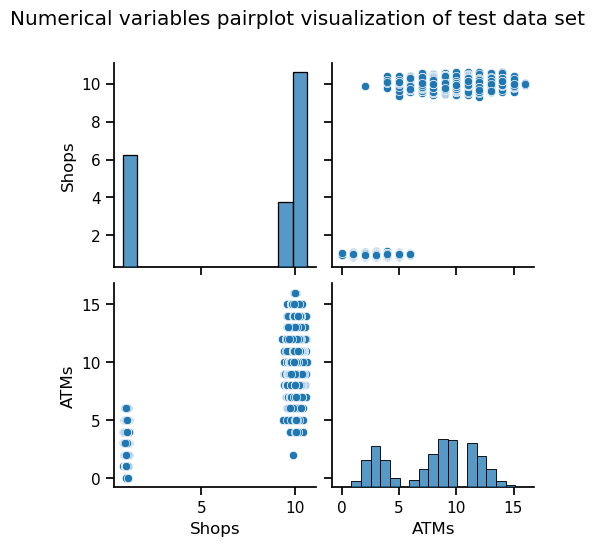

In [16]:
numerical_features = ['Shops','ATMs']
numerical_data = real_test[numerical_features]
g = sns.pairplot(numerical_data)
g.fig.suptitle("Numerical variables pairplot visualization of test data set", y=1.08)
plt.show()

The test dataset also shows trends of clustering and the same distribution pattern.

### Categorical variables

/var/folders/mn/bfvvfc_n6b54lsgwjzpnvp1h0000gn/T/ipykernel_58850/2891848291.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[var_name].hist(bins=3,ax=ax, density=False)


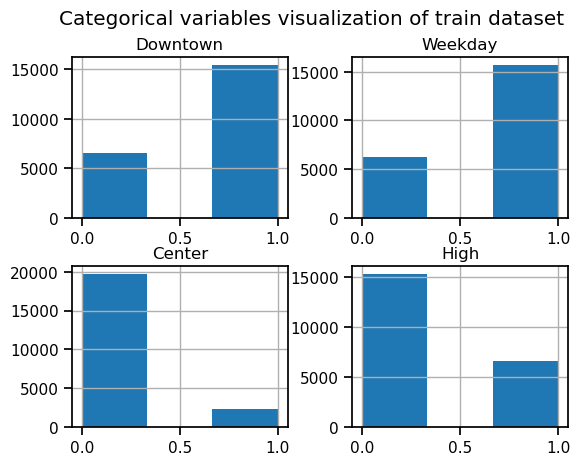

/var/folders/mn/bfvvfc_n6b54lsgwjzpnvp1h0000gn/T/ipykernel_58850/2891848291.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[var_name].hist(bins=3,ax=ax, density=False)


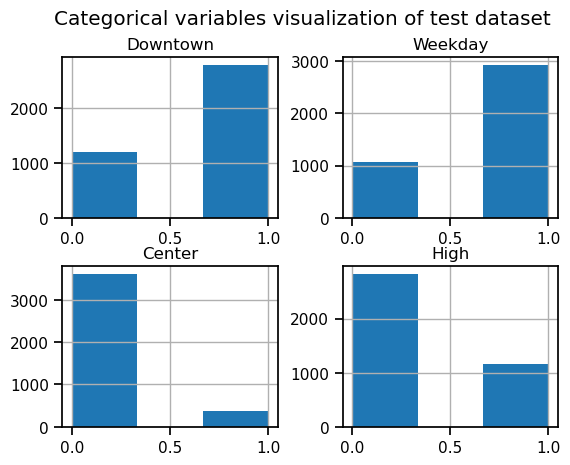

In [17]:
cate_var = [['Downtown','Weekday','Center','High']]

def draw_histograms(df, variables, n_rows, n_cols,title):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=3,ax=ax, density=False)
        df[var_name].plot(ax = ax, kind='bar', grid=True)
        ax.set_title(var_name)
    plt.suptitle(title)
    plt.show()

draw_histograms(atm_data, cate_var, 2, 2,'Categorical variables visualization of train dataset')
draw_histograms(real_test, cate_var, 2, 2, 'Categorical variables visualization of test dataset')

In Center and High of the train dataset, class 0 outnumbered class 1, while in Downtown and Weekday, the situation was the opposite. Hence, the distribution of data was unequal, and the result may be biased.

The same goes to those of the test dataset.

### Quadratic terms analysis with 2 numerical variables: Shops and ATMs

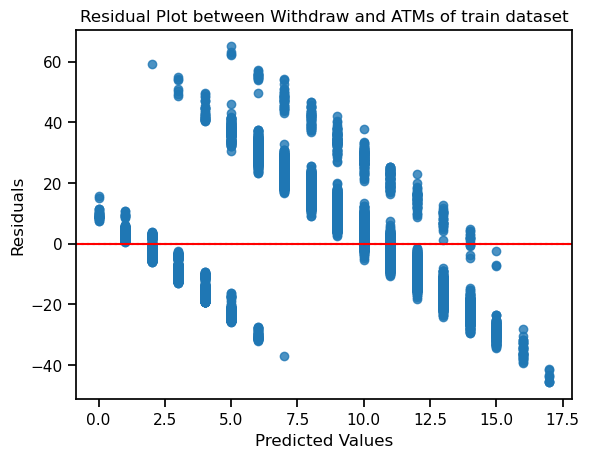

In [18]:
sns.residplot(x='ATMs', y='Withdraw', data=atm_data)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot between Withdraw and ATMs of train dataset')
plt.show()

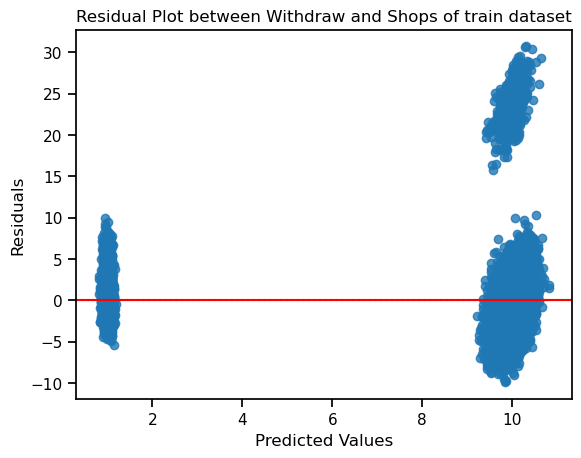

In [19]:
sns.residplot(x='Shops', y='Withdraw', data=atm_data)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot between Withdraw and Shops of train dataset')
plt.show()

Both residual plots does not show an U-shape pattern. Hence, it is not likely that there will be any quadratic terms.

### Response variable

Text(0.5, 0, 'Withdraw')

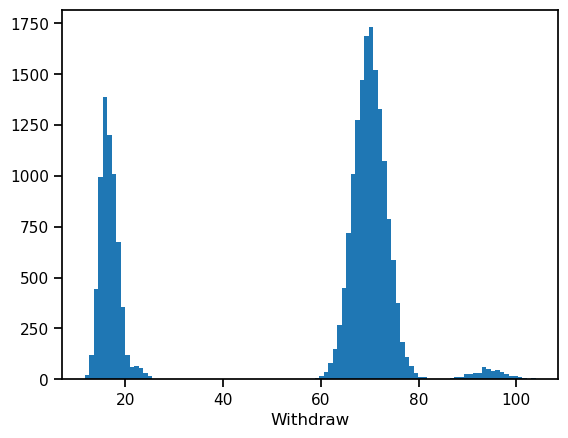

In [20]:
plt.hist(atm_data['Withdraw'], density=False, bins=100)  # density=False would make counts

plt.xlabel('Withdraw')

Withdraw data is not normally distributed. Hence, there might be insufficient data to make the dependent variable normally distributed.

## Multicolinearity analysis

Use VIF to analyze multicolinearity between independent variables and drop unnecessary variables. A high VIF score indicates a strong correlation of that variable with other variables.

In [21]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = add_constant(atm_data)
calc_vif(X.iloc[:, :7])

,variables,VIF
0,const,43.108902
1,Shops,575.967009
2,ATMs,4.227052
3,Downtown,579.454764
4,Weekday,1.000340
5,Center,1.000210
6,High,1.000233


It shows that both Shops and Downtown have high VIF score, meaning that they could be predicted by other variables in the data set, leading to multicolinearity. Hence, we could reduce the multicolinearity by dropping one of the two variables in the model.

Since Downtown has the highest VIF score, we could drop this variable to reduce multicolinearity.

In [22]:
X = add_constant(atm_data.drop(['Downtown'],axis=1))
calc_vif(X.iloc[:, :5])

,variables,VIF
0,const,8.285936
1,Shops,4.201489
2,ATMs,4.201222
3,Weekday,1.000232
4,Center,1.000098


By dropping Downtown, the other variables are also affected as it has correlation with each other. In this scencario, since Downtown is the cause of multicolinearity, dropping this variable has reduced the VIF score of other variables significantly. All variables are now below the VIF threshold score of 5.

## Make interaction terms

In [23]:
atm_data['Shops_ATMs'] = atm_data['Shops']*atm_data['ATMs']
atm_data['Shops_Weekday'] = atm_data['Shops']*atm_data['Weekday']
atm_data['Shops_Center'] = atm_data['Shops']*atm_data['Center']
atm_data['Shops_High'] = atm_data['Shops']*atm_data['High']
atm_data['ATMs_Weekday'] = atm_data['ATMs']*atm_data['Weekday']
atm_data['ATMs_Center'] = atm_data['ATMs']*atm_data['Center']
atm_data['ATMs_High'] = atm_data['ATMs']*atm_data['High']
atm_data['Weekday_Center'] = atm_data['Weekday']*atm_data['Center']
atm_data['Weekday_High'] = atm_data['Weekday']*atm_data['High']
atm_data['Center_High'] = atm_data['Center']*atm_data['High']

### **Split dataset into train and test data**

In [24]:
kf=KFold(10, shuffle=True, random_state=1) 

#70% of the data for training and the rest 30% for testing
train = atm_data.sample(frac=0.7, random_state=1)

test = atm_data[atm_data.index.isin(train.index)==False]
train.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw,Shops_ATMs,Shops_Weekday,Shops_Center,Shops_High,ATMs_Weekday,ATMs_Center,ATMs_High,Weekday_Center,Weekday_High,Center_High
12633,10.16,9,1,1,0,1,71.649653,91.44,10.16,0.0,10.16,9,0,9,0,1,0
7583,10.48,13,1,1,0,1,73.242274,136.24,10.48,0.0,10.48,13,0,13,0,1,0
6709,10.08,12,1,1,0,1,68.508768,120.96,10.08,0.0,10.08,12,0,12,0,1,0
7540,10.21,12,1,0,0,0,71.144140,122.52,0.00,0.0,0.00,0,0,0,0,0,0
15125,10.10,10,1,0,0,0,71.801984,101.00,0.00,0.0,0.00,0,0,0,0,0,0


### **Standardize data**

In [25]:
x_train_mu = train[['Shops','ATMs','Shops_ATMs','Shops_Weekday', 'Shops_Center','Shops_High', 'ATMs_Weekday', 'ATMs_Center','ATMs_High']].copy().mean()
x_train_sigma = train[['Shops','ATMs','Shops_ATMs','Shops_Weekday', 'Shops_Center','Shops_High', 'ATMs_Weekday', 'ATMs_Center','ATMs_High']].copy().std()

train[['Shops','ATMs','Shops_ATMs','Shops_Weekday', 'Shops_Center','Shops_High', 'ATMs_Weekday', 'ATMs_Center','ATMs_High']] = (train[['Shops','ATMs','Shops_ATMs','Shops_Weekday', 'Shops_Center','Shops_High', 'ATMs_Weekday', 'ATMs_Center','ATMs_High']] - x_train_mu)/x_train_sigma
test[['Shops','ATMs','Shops_ATMs','Shops_Weekday', 'Shops_Center','Shops_High', 'ATMs_Weekday', 'ATMs_Center','ATMs_High']] = (test[['Shops','ATMs','Shops_ATMs','Shops_Weekday', 'Shops_Center','Shops_High', 'ATMs_Weekday', 'ATMs_Center','ATMs_High']] - x_train_mu)/x_train_sigma
test.head()

/var/folders/mn/bfvvfc_n6b54lsgwjzpnvp1h0000gn/T/ipykernel_58850/2967302802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['Shops','ATMs','Shops_ATMs','Shops_Weekday', 'Shops_Center','Shops_High', 'ATMs_Weekday', 'ATMs_Center','ATMs_High']] = (test[['Shops','ATMs','Shops_ATMs','Shops_Weekday', 'Shops_Center','Shops_High', 'ATMs_Weekday', 'ATMs_Center','ATMs_High']] - x_train_mu)/x_train_sigma


,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw,Shops_ATMs,Shops_Weekday,Shops_Center,Shops_High,ATMs_Weekday,ATMs_Center,ATMs_High,Weekday_Center,Weekday_High,Center_High
1,0.591158,0.568940,1,1,0,0,66.720482,0.554993,0.938061,-0.291772,-0.547052,0.915093,-0.305000,-0.576941,0,0,0
9,-1.527355,-1.614112,0,1,0,0,15.906492,-1.449169,-0.882252,-0.291772,-0.547052,-0.775736,-0.305000,-0.576941,0,0,0
14,-1.539475,-1.341231,0,0,1,1,22.594808,-1.431312,-1.090526,0.075066,-0.313020,-1.198444,0.820208,0.145251,0,0,1
15,0.654180,1.933348,1,1,0,0,64.898925,1.660013,0.992212,-0.291772,-0.547052,1.971861,-0.305000,-0.576941,0,0,0
18,-1.520083,-1.614112,0,0,0,0,18.340003,-1.447909,-1.090526,-0.291772,-0.547052,-1.198444,-0.305000,-0.576941,0,0,0


# Method

## OLS

### Case 1: Forward stepwise OLS with the available variables (without interaction terms)

In this case, we want to investigate into the available models and see how well it would perform without any interaction terms. We start with null model and add each variable to find the most significant variables.

In [26]:
y_var = ['Withdraw']
x_var = ['Shops']
model = "Withdraw ~ Shops"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = (mean_squared_error(test[y_var], y_pred)).round(4)
print(f"Test MSE: {test_mse}")

Train MSE: 18.1049
Test MSE: 16.9889


In [27]:
y_var = ['Withdraw']
x_var = ['ATMs']
model = "Withdraw ~ ATMs"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 204.3476
Test MSE: 197.3542


In [28]:
y_var = ['Withdraw']
x_var = ['Weekday']
model = "Withdraw ~ Weekday"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 631.5952
Test MSE: 621.2501


In [29]:
y_var = ['Withdraw']
x_var = ['Center']
model = "Withdraw ~ Center"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 628.099
Test MSE: 618.2906


In [30]:
y_var = ['Withdraw']
x_var = ['High']
model = "Withdraw ~ High"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 632.8213
Test MSE: 622.6064


Since Shops has the lowest MSE, we would keep it in our model and continue to run OLS with other variables.

In [31]:
y_var = ['Withdraw']
x_var = ['Shops', 'ATMs']
model = "Withdraw ~ Shops + ATMs"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 14.4483
Test MSE: 13.7953


In [32]:
y_var = ['Withdraw']
x_var = ['Shops', 'Weekday']
model = "Withdraw ~ Shops + Weekday"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 15.4792
Test MSE: 14.7094


In [33]:
y_var = ['Withdraw']
x_var = ['Shops', 'Center']
model = "Withdraw ~ Shops + Center"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 13.1324
Test MSE: 12.3041


In [34]:
y_var = ['Withdraw']
x_var = ['Shops', 'High']
model = "Withdraw ~ Shops + High"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 17.8672
Test MSE: 16.7526


Among the models, Shops + Center has the lowest MSE. Hence, we will keep Center in our model.

In [35]:
y_var = ['Withdraw']
x_var = ['Shops', 'Center','ATMs']
model = "Withdraw ~ Shops + Center + ATMs"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 9.5608
Test MSE: 9.0945


In [36]:
y_var = ['Withdraw']
x_var = ['Shops', 'Center', 'Weekday']
model = "Withdraw ~ Shops + Center + Weekday"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()


#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 10.5693
Test MSE: 10.035


In [37]:
y_var = ['Withdraw']
x_var = ['Shops', 'Center', 'High']
model = "Withdraw ~ Shops + Center + High"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 12.9127
Test MSE: 12.0981


Adding ATMs has reduced the MSE of the model to 9. Hence, we will add ATMs to our final model.

In [38]:
x_var = ['Shops','Center','ATMs','Weekday']
model = "Withdraw ~ Shops + Center + ATMs + Weekday"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 7.0077
Test MSE: 6.7296


In [39]:
y_var = ['Withdraw']
x_var = ['Shops','Center','ATMs','High']
model = "Withdraw ~ Shops + Center + ATMs + High"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 9.358
Test MSE: 8.8972


Adding Weekday lowers MSE to 6. We will add High to the model to see if it continues to lower the MSE.

In [40]:
y_var = ['Withdraw']
x_var = ['Shops','Center','ATMs','Weekday', 'High']
model = "Withdraw ~ Shops + Center + ATMs + Weekday + High"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 6.814
Test MSE: 6.5408


Adding the High variable does lower the MSE a bit, but it is not so significant. Hence, this is an insignificant in the model and we will not add it to our final model.

### Model 1: Final forward stepwise model 

Final model will include 4 variables: Shops, Center, ATMs, Weekday.

In [41]:
y_var = ['Withdraw']
x_var = ['Shops','Center','ATMs','Weekday']
model = "Withdraw ~ Shops + Center + ATMs + Weekday"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()
print(results.summary())

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 3.442e+05
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:32:43   Log-Likelihood:                -36836.
No. Observations:               15400   AIC:                         7.368e+04
Df Residuals:                   15395   BIC:                         7.372e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.3626      0.041   1389.284      0.0

AxesSubplot(0.125,0.11;0.775x0.77)


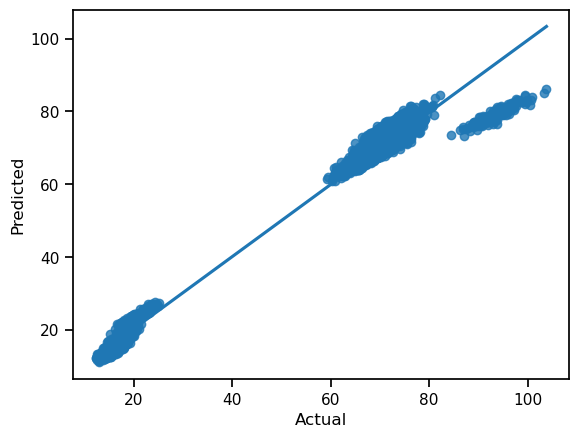

In [42]:
p = sns.regplot(x=test[y_var], y=results.predict(test[x_var]), ci=0.2, color=None)
p.set_xlabel("Actual")
p.set_ylabel("Predicted")

print(p)

The model seems to perform well, as the variance between the actual and predicted value is not much.

### Case 2: OLS with the all independent variables and interaction terms

In [43]:
y_var = ['Withdraw']
x_var = ['Shops','ATMs','Weekday','Center','High', 'Shops_ATMs', 'Shops_Weekday', 
'Shops_Center', 'Shops_High', 'ATMs_Weekday', 'ATMs_Center', 'ATMs_High',
        'Weekday_Center', 'Weekday_High', 'Center_High']
model = "Withdraw ~ Shops + ATMs + Weekday + Center + High + Shops_ATMs + Shops_Weekday + Shops_Center + Shops_High + ATMs_Weekday + ATMs_Center + ATMs_High + Weekday_Center + Weekday_High + Center_High"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()
print(results.summary())

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.110e+05
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:32:45   Log-Likelihood:                -27493.
No. Observations:               15400   AIC:                         5.502e+04
Df Residuals:                   15384   BIC:                         5.514e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         54.3795      0.052   1051.

We remove the variables with p-vale > 5% and fit into OLS again to create new model.

### Model 2: OLS with all variables (including interaction terms)

In [44]:
y_var = ['Withdraw']
x_var = ['Shops','ATMs','Weekday','Center','High', 'Shops_ATMs', 'Shops_Weekday', 
'Shops_Center', 'ATMs_Weekday','Weekday_Center']
model = "Withdraw ~ Shops + ATMs + Weekday + Center + High + Shops_ATMs + Shops_Weekday + Shops_Center + ATMs_Weekday + Weekday_Center"

model_formula = smf.ols(formula = model, data = train)
results = model_formula.fit()
print(results.summary())

#print the train MSE value
scores = cross_val_score(LinearRegression(), train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = results.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.666e+05
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:32:45   Log-Likelihood:                -27495.
No. Observations:               15400   AIC:                         5.501e+04
Df Residuals:                   15389   BIC:                         5.510e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         54.3944      0.047   1157.

After removing those variables, the MSE does not seem to be significantly affected. MSE is around 2.08 for both train and test MSE. Hence, those are the insignificant variables.

AxesSubplot(0.125,0.11;0.775x0.77)


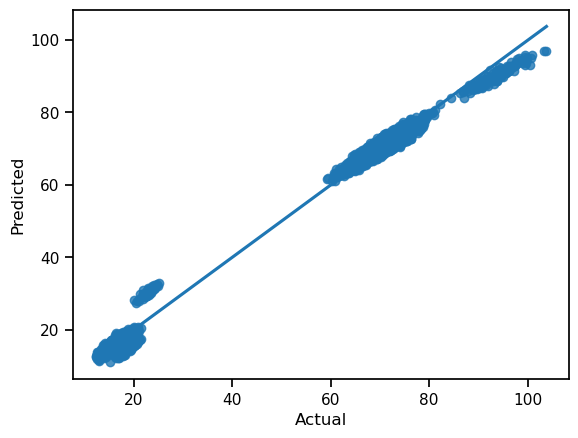

In [45]:
p = sns.regplot(x=test[y_var], y=results.predict(test[x_var]), ci=0.2, color=None)
p.set_xlabel("Actual")
p.set_ylabel("Predicted")

print(p)

## Lasso

### Model 3: Lasso regression with available variables (without interaction terms)

With LASSO regression, we want to cancel out all insignificant variables. We use CV to find the best alpha:

In [46]:
y_var = ['Withdraw']
x_var = ['Shops','ATMs','Weekday','Center','High']

lasso = LassoCV(cv=5) 

lasso.fit(train[x_var], np.ravel(train[y_var]))
print("LASSO Alpha: {0}".format(lasso.alpha_.round(4)))

LASSO Alpha: 0.0248


In [47]:
Lasso_reg = linear_model.Lasso(lasso.alpha_)
Lasso_reg.fit(train[x_var], np.ravel(train[y_var])) #fit the model
pd.DataFrame(Lasso_reg.coef_.round(4), index = x_var).T

,Shops,ATMs,Weekday,Center,High
0,27.9818,-3.658,-3.4073,6.9446,0.8474


In this case, all variables are significant.

In [48]:
#print the train MSE value
scores = cross_val_score(Lasso_reg, train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = Lasso_reg.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 6.8366
Test MSE: 6.54


AxesSubplot(0.125,0.11;0.775x0.77)


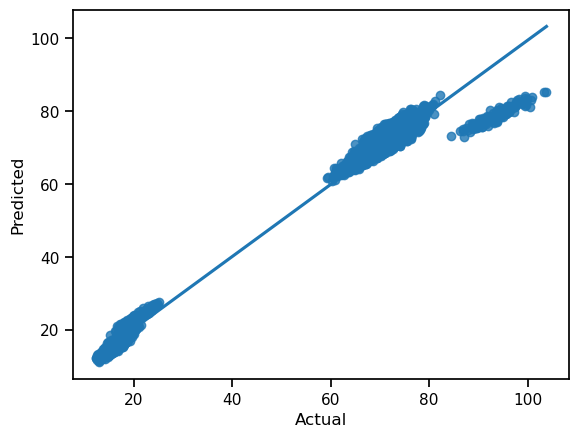

In [49]:
import seaborn as sns 

p = sns.regplot(x=test[y_var], y=Lasso_reg.predict(test[x_var]), ci=0.2, color=None)
p.set_xlabel("Actual")
p.set_ylabel("Predicted")

print(p)

#### The model seems to perform well, as the variance between the actual and predicted value is not much.

### Model 4: Lasso regression with all variables

We will also try to use Lasso to cancel out the insignificant one.

In [50]:
y_var = ['Withdraw']
x_var = ['Shops','ATMs','Weekday','Center','High', 'Shops_ATMs', 'Shops_Weekday', 
'Shops_Center', 'Shops_High', 'ATMs_Weekday', 'ATMs_Center', 'ATMs_High',
        'Weekday_Center', 'Weekday_High', 'Center_High']
model = "Withdraw ~ Shops + ATMs + Weekday + Center + High + Shops_ATMs + Shops_Weekday + Shops_Center + Shops_High + ATMs_Weekday + ATMs_Center + ATMs_High + Weekday_Center + Weekday_High + Center_High"

In [51]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5) 

lasso.fit(train[x_var], np.ravel(train[y_var]))
print("LASSO Alpha: {0}".format(lasso.alpha_.round(4)))

LASSO Alpha: 0.0248


In [52]:
from sklearn import linear_model #package we need to do Lasso regression
Lasso_reg = linear_model.Lasso(lasso.alpha_)
Lasso_reg.fit(train[x_var], np.ravel(train[y_var])) #fit the model
pd.DataFrame(Lasso_reg.coef_.round(4), index = x_var).T

,Shops,ATMs,Weekday,Center,High,Shops_ATMs,Shops_Weekday,Shops_Center,Shops_High,ATMs_Weekday,ATMs_Center,ATMs_High,Weekday_Center,Weekday_High,Center_High
0,27.8442,-3.1736,-0.2139,10.5363,0.6663,0.0,-0.3469,1.7354,0.1113,-0.8213,0.085,0.0,-12.4244,0.0,0.0


Since some variables have been shrinked to 0, this model will include the following variables: Shops, ATMs, Weekdays, Center, High, Shops_Weekday, Shops_Center, Shops_High, ATMs_Weekday, ATMs_Center, Weekday_Center

In [53]:
#print the train MSE value
scores = cross_val_score(Lasso_reg, train[x_var], train[y_var], cv=10, scoring='neg_mean_squared_error')
print(f"Train MSE: {(-scores.mean()).round(4)}")

#print the test MSE value
y_pred = Lasso_reg.predict(test[x_var])
test_mse = mean_squared_error(test[y_var], y_pred)
print(f"Test MSE: {test_mse.round(4)}")

Train MSE: 2.2569
Test MSE: 2.2159


AxesSubplot(0.125,0.11;0.775x0.77)


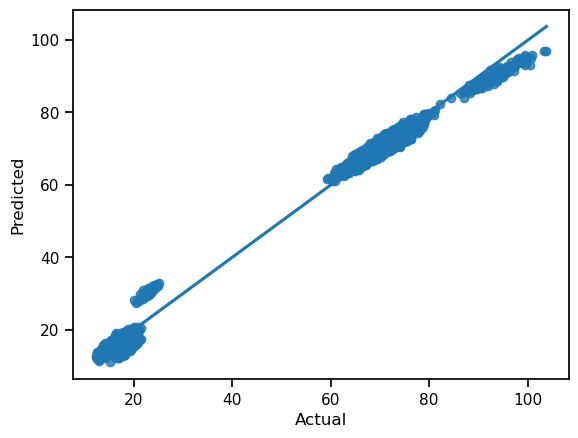

In [54]:
import seaborn as sns 

p = sns.regplot(x=test[y_var], y=results.predict(test[x_var]), ci=0.2, color=None)
p.set_xlabel("Actual")
p.set_ylabel("Predicted")

print(p)